# Preprocessing

---

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import copy

## Dataset

For this practice, a dataset consisting of five files has been provided, each corresponding to a different driver (Driver1-5). For each driver, there are five Excel files containing data collected during the execution of five different driving maneuvers:
- Overtaking.
- Stopping.
- Turning.
- Three-step turn.
- U-turn.

Each file follows a uniform format, where each row represents a time instance, and each column stores the value of a signal recorded at that moment. A total of 22 different signals have been collected, although only the following will be used in this practice:
- Speed – Vehicle speed.
- RPM – Revolutions per minute.
- Steering Wheel Angle – Steering wheel angle.
- Gas Pedal – Accelerator pedal.
- Brake Pedal – Brake pedal.
- Clutch Pedal – Clutch pedal.
- Gear – Gear position.

Additionally, the "Maneuver Marker Flag" column indicates the execution of a maneuver at each time instance. Its value is 1 when the corresponding maneuver is in progress and 0 when it is not.
It is worth noting that the data has a high sampling frequency, recording values 20 times per second for each driver and maneuver.

In [52]:
data_path = 'data/'
drivers = list(os.listdir(data_path))
print("Drivers: " ,drivers)

maneuver_types = [f.split("_")[1].split(".")[0] for f in os.listdir(os.path.join(data_path, drivers[0]))]
print("Maneuvers set: ", maneuver_types)

Drivers:  ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
Maneuvers set:  ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']


The data from the five drivers and maneuvers is gathered into a dictionary of dataframes, where each key corresponds to a driver and maneuver combination.

In [53]:
# Get all drivers data
dfs = {}
for driver in drivers:
    maneuvers = {}
    for maneuver in maneuver_types:
        df_path = os.path.join(data_path, driver, f"STISIMData_{maneuver}.xlsx")
        df = pd.read_excel(df_path)
        maneuvers[maneuver] = df
    dfs[driver] = maneuvers

print(dfs.keys())
print(dfs[drivers[0]].keys())

dict_keys(['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5'])
dict_keys(['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings'])


## EDA (Exploratory Data Analysis)

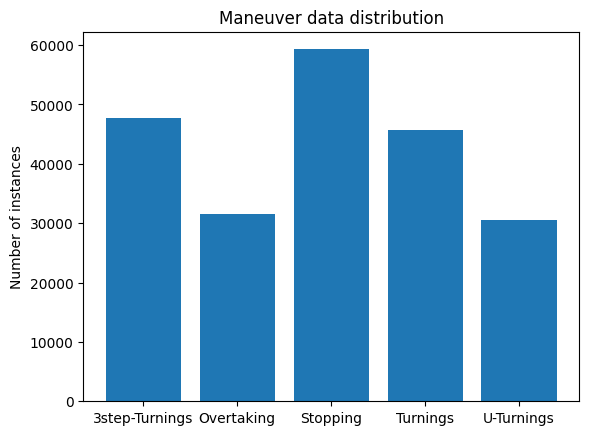

In [ ]:
maneuvers_data = {}
for maneuver in maneuver_types:
    count = 0
    for driver in drivers:
        count += len(dfs[driver][maneuver])
    maneuvers_data[maneuver] = count

# Plot the number of data points for each maneuver
plt.bar(maneuvers_data.keys(), maneuvers_data.values())
plt.ylabel('Samples')
plt.title('Maneuver data distribution')
plt.show()

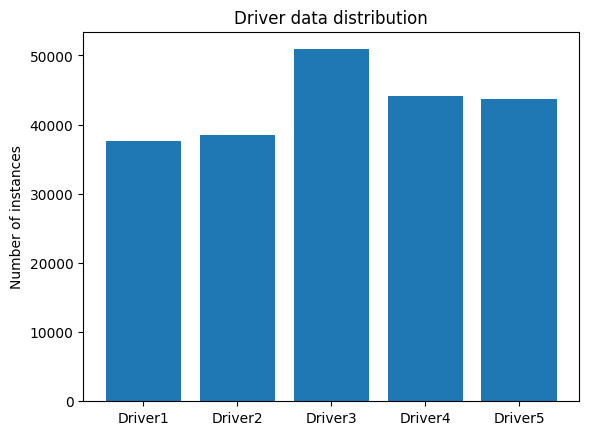

In [67]:
drivers_data = {}
for driver in drivers:
    count = 0
    for maneuver in maneuver_types:
        count += len(dfs[driver][maneuver])
    drivers_data[driver] = count

# Plot the number of data points for each driver
plt.bar(drivers_data.keys(), drivers_data.values())
plt.ylabel('Number of instances')
plt.title('Driver data distribution')
plt.show()

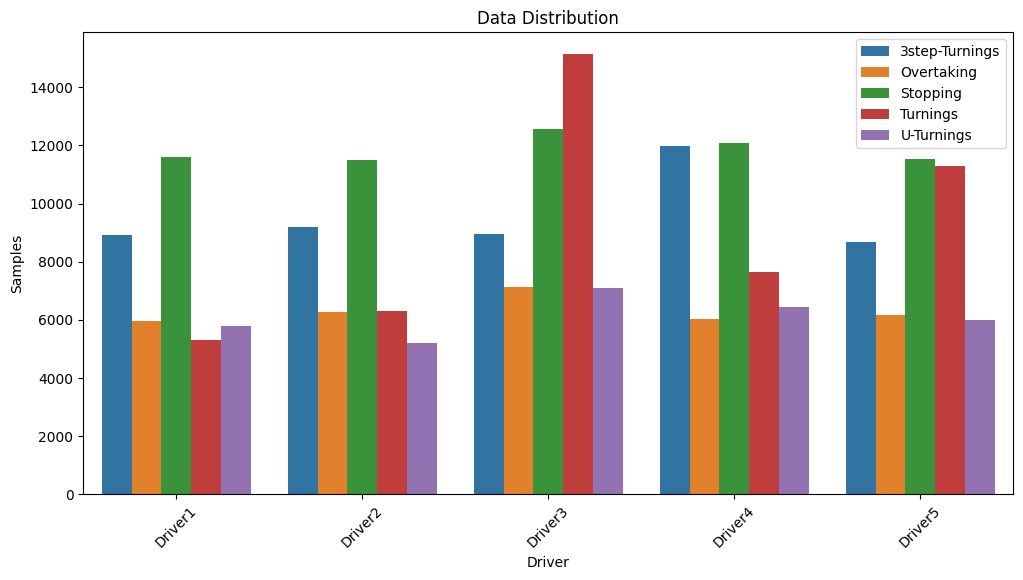

In [69]:
data_counts = []

for driver, maneuvers in dfs.items():
    for maneuver, df in maneuvers.items():
        data_counts.append({"Driver": driver, "Maneuver": maneuver, "Count": len(df)})

data_counts_df = pd.DataFrame(data_counts)

plt.figure(figsize=(12, 6))
sns.barplot(data=data_counts_df, x="Driver", y="Count", hue="Maneuver")

plt.title("Data Distribution")
plt.ylabel("Samples")
plt.legend()
plt.xticks(rotation=45)
plt.show()

We can see that the dataset is unbalanced when it comes to the number of samples per maneuver and driver.   
However, it is quite balanced when it comes to the distribution of maneuver data across drivers, except for 'Driver3' which has significantly more samples of 'Turnings' than the rest.

In [54]:
def get_dfs_copy(dfs):
    return copy.deepcopy(dfs)

dfs_copy = copy.deepcopy(dfs)

In [55]:
example_df = dfs_copy[drivers[0]][maneuver_types[0]]
print("Number of attributes:", len(example_df.columns))
example_df.columns

Number of attributes: 23


Index(['Elapsed time', 'Long Dist', 'Lat Pos', 'Steering wheel angle',
       'Throttle input', 'Brake pedal force', 'Gas pedal', 'Brake pedal',
       'Clutch pedal', 'Left turn', 'Right turn', 'Gear', 'speed', 'RPM',
       'Hand wheel torque', 'Maneuver marker flag', 'Accidents', 'Collisions',
       'Peds Hit', 'Speeding Tics', 'Red Lgt Tics', 'Speed Exceed',
       'Stop Sign Ticks'],
      dtype='object')

A total of 22 different signals were collected in the original data, although only the following will be used in this practice:
- Speed – Vehicle speed.
- RPM – Revolutions per minute.
- Steering Wheel Angle – Steering wheel angle.
- Gas Pedal – Accelerator pedal.
- Brake Pedal – Brake pedal.
- Clutch Pedal – Clutch pedal.
- Gear – Gear position.

Additionally, the `Maneuver Marker Flag` column indicates the execution of a maneuver at each time instance. Its value is 1 when the corresponding maneuver is in progress and 0 when it is not.

In [56]:
# Allowed attributes
attributes = ['speed', 'RPM', 'Steering wheel angle', 'Gas pedal', 'Brake pedal', 'Clutch pedal', 'Gear', 'Maneuver marker flag']
features = ['speed', 'RPM', 'Steering wheel angle', 'Gas pedal', 'Brake pedal', 'Clutch pedal', 'Gear']
target = 'Maneuver marker flag'

# Drop unnecessary columns
for driver in drivers:
    for maneuver in maneuver_types:
        dfs_copy[driver][maneuver] = dfs_copy[driver][maneuver][attributes]

dfs_copy[drivers[0]][maneuver_types[0]].head()

,speed,RPM,Steering wheel angle,Gas pedal,Brake pedal,Clutch pedal,Gear,Maneuver marker flag
0,0.06,147.244,-8.24,0,0,0,0,0
1,0.04,184.118,-8.24,0,0,0,0,0
2,0.02,219.193,-8.24,0,0,0,0,0
3,0.00,252.554,-8.24,0,0,0,0,0
4,0.00,284.287,-8.24,0,0,0,0,0


In [57]:
dfs_copy[drivers[0]][maneuver_types[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8933 entries, 0 to 8932
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   speed                 8933 non-null   float64
 1   RPM                   8933 non-null   float64
 2   Steering wheel angle  8933 non-null   float64
 3   Gas pedal             8933 non-null   int64  
 4   Brake pedal           8933 non-null   int64  
 5   Clutch pedal          8933 non-null   int64  
 6   Gear                  8933 non-null   int64  
 7   Maneuver marker flag  8933 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 558.4 KB


In [58]:
dfs_copy[drivers[0]][maneuver_types[0]].dtypes

speed                   float64
RPM                     float64
Steering wheel angle    float64
Gas pedal                 int64
Brake pedal               int64
Clutch pedal              int64
Gear                      int64
Maneuver marker flag      int64
dtype: object

In [59]:
dfs_copy[drivers[0]][maneuver_types[0]].describe()

,speed,RPM,Steering wheel angle,Gas pedal,Brake pedal,Clutch pedal,Gear,Maneuver marker flag
count,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000
mean,27.076534,1690.436524,-4.288223,19731.515392,1187.196239,32681.562745,0.983656,0.591627
std,27.264831,960.969137,229.965259,17383.355246,3626.100086,23721.195196,1.346223,0.491560
min,0.000000,124.919000,-466.580000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,3.220000,921.292000,-56.640000,0.000000,0.000000,11565.000000,0.000000,0.000000
50%,14.510000,1282.623000,-2.060000,20160.000000,0.000000,25828.000000,1.000000,1.000000
75%,49.460000,2358.363000,14.420000,35405.000000,0.000000,64253.000000,2.000000,1.000000
max,84.590000,4774.648000,414.060000,59627.000000,29041.000000,64253.000000,4.000000,1.000000


Example of features distribution for the `3step-Turnings` maneuver:

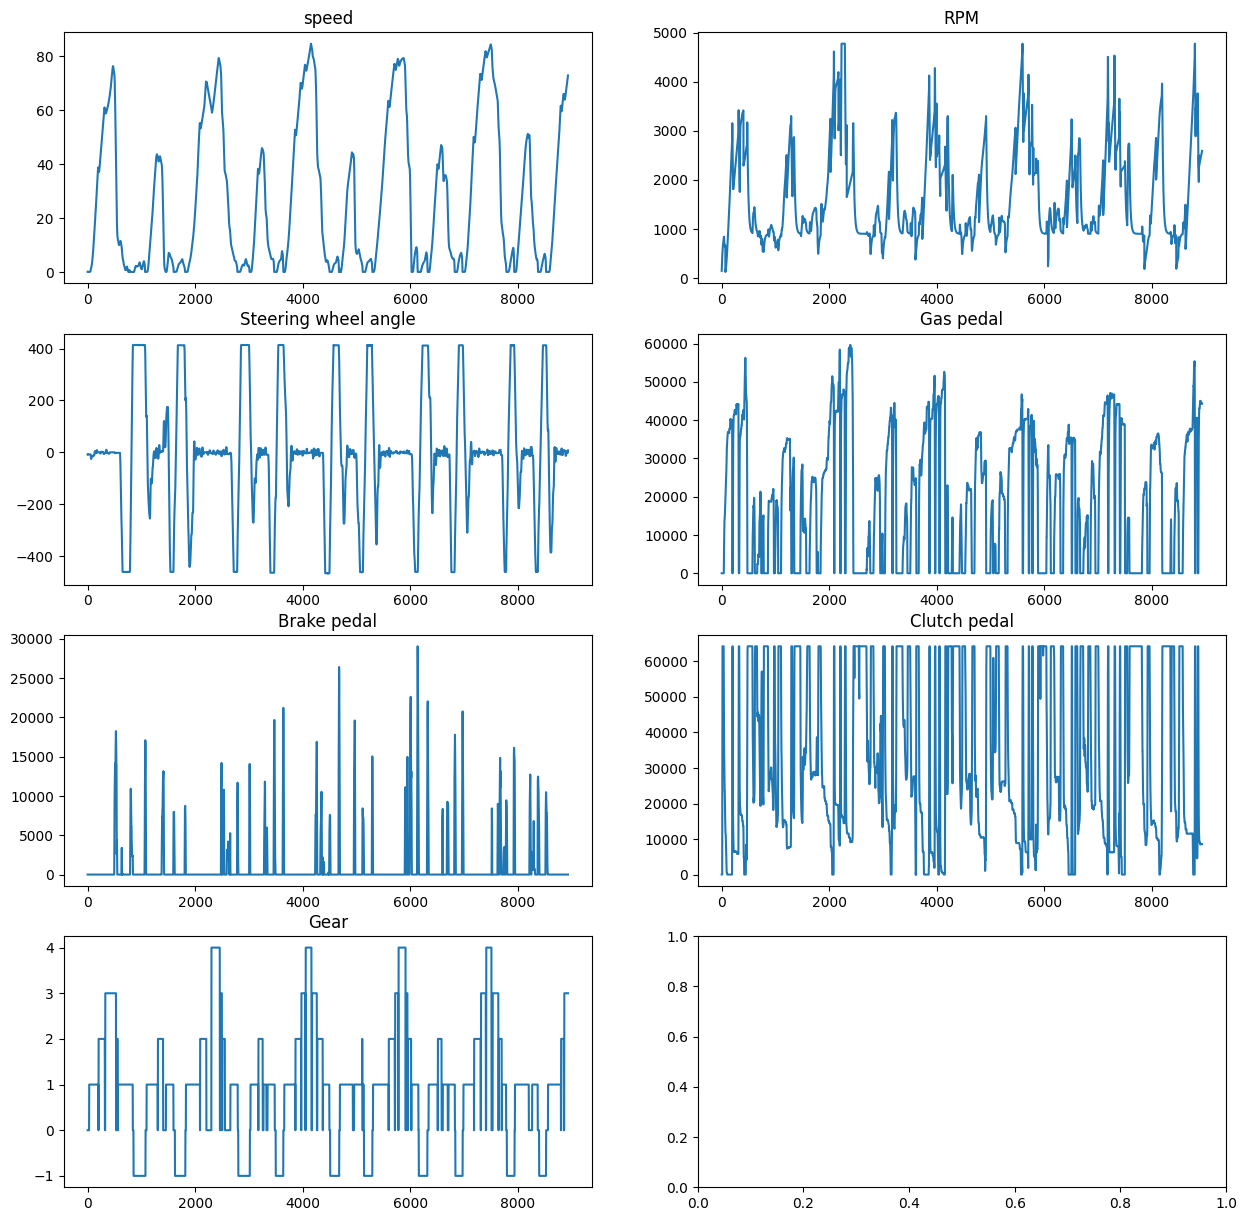

In [60]:
example_df = dfs_copy[drivers[0]][maneuver_types[0]]

# Plot each feature in subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    ax = axs[i//2, i%2]
    ax.plot(example_df[feature])
    ax.set_title(feature)
plt.show()

## Data Preprocessing

To generate the final dataset, several modifications have been applied to the provided data:

- Eight new attributes have been added using sliding windows to incorporate data from previous instances:

    - `speed_mean` and `speed_std`: Mean and standard deviation of speed over the last window_size instances.

    - `RPM_mean` and `RPM_std`: Mean and standard deviation of RPM over the last window_size instances.

    - `brake_mean` and `brake_std`: Mean and standard deviation of brake usage over the last window_size instances.
    
    - `gas_mean` and `gas_std`: Mean and standard deviation of accelerator usage over the last window_size instances.

- The target label is set as the `Maneuver Marker Flag` of the next instance, as the objective is to predict whether the maneuver is about to occur.
- The data is split into training and testing sets using different drivers for each set to avoid data leakage.
    - Training set: 4 drivers.
    - Testing set: 1 driver.

The reason for splitting the data by driver is to ensure that the model generalizes well to new drivers. This is **important** because driving styles can vary significantly between individuals, and the model should be able to predict maneuvers accurately for any driver.   
If the model were trained and evaluated on data from all drivers, even if we take different instances for training and testing, the evaluation would not be representative of the model's performance on new drivers, since the model is predicting driving patterns that have already been seen during training.

In [61]:
def get_loaders(
    test_driver_ind, maneuver_ind, window_size, drivers, maneuver_names, dfs, window_step=None, verbose=False
):
    if verbose:
        print("INFO: parsing driving dataset")
        print(f"INFO: drivers found {drivers}")
        print(f"INFO: maneuvers found {maneuver_names}")
        print(f"INFO: summary:")
        print(f"INFO: using maneuver {maneuver_names[maneuver_ind]} data")
        print(f"INFO: using driver {drivers[test_driver_ind]} for test split")
        print(f"INFO: {'no-overlapping' if window_step else 'overlapping'} processed dataframe")
        print(f"INFO: window-size {window_size}")

    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []

    for i, driver in enumerate(drivers):
        df = copy.deepcopy(dfs[driver][maneuver_names[maneuver_ind]])

        # Create new features using sliding windows
        df['speed_mean'] = df['speed'].rolling(window=window_size, min_periods=1, step=window_step).mean()
        df['speed_std'] = df['speed'].rolling(window=window_size, min_periods=1, step=window_step).std()
        df['RPM_mean'] = df['RPM'].rolling(window=window_size, min_periods=1, step=window_step).mean()
        df['RPM_std'] = df['RPM'].rolling(window=window_size, min_periods=1, step=window_step).std()
        df['brake_mean'] = df['Brake pedal'].rolling(window=window_size, min_periods=1, step=window_step).mean()
        df['brake_std'] = df['Brake pedal'].rolling(window=window_size, min_periods=1, step=window_step).std()
        df['gas_mean'] = df['Gas pedal'].rolling(window=window_size, min_periods=1, step=window_step).mean()
        df['gas_std'] = df['Gas pedal'].rolling(window=window_size, min_periods=1, step=window_step).std()

        # Define the target: if a maneuver occurs in the next instant (t+1)
        df["target"] = df["Maneuver marker flag"].shift(-1)

        # Drop rows with NaN values
        df = df.dropna()

        # Separate features and target
        X_driver = df.drop(columns=["Maneuver marker flag", "target"])
        y_driver = df["target"]

        if i == test_driver_ind:
            X_test_list.append(X_driver)
            y_test_list.append(y_driver)
        else:
            X_train_list.append(X_driver)
            y_train_list.append(y_driver)

    X_train = pd.concat(X_train_list, ignore_index=True)
    X_test = pd.concat(X_test_list, ignore_index=True)
    y_train = pd.concat(y_train_list, ignore_index=True)
    y_test = pd.concat(y_test_list, ignore_index=True)

    if verbose:
        print(f"INFO: X_train {X_train.shape}, X_test {X_test.shape}")
        print(f"INFO: y_train {y_train.shape}, y_test {y_test.shape}")

    return X_train, X_test, y_train, y_test

## Examples of final dataset

### Overlapping Dataset

This dataset is created by sliding a window of size `window_size` over the original data. This results in overlapping instances, where each instance contains the data from the previous `window_size` instances.

In [62]:
window_size = 60
window_step = None      # Overlapping
maneuver_index = 0      # 3step-Turnings
test_driver_index = 0   # Driver1 for testing

X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = maneuver_index,
    drivers = drivers,
    maneuver_names = maneuver_types,
    dfs = dfs_copy,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver 3step-Turnings data
INFO: using driver Driver1 for test split
INFO: overlapping processed dataframe
INFO: window-size 60
INFO: X_train (38786, 15), X_test (8931, 15)
INFO: y_train (38786,), y_test (8931,)


### Non-Overlapping Dataset

This dataset is created by sliding a window of size `window_size` over the original data with a step size of `window_size`. This results in non-overlapping instances, where each new instance contains the data from the previous `window_size` instances, but any of the instances share data.

In [63]:
window_size = 60
window_step = window_size   # Overlapping
maneuver_index = 0          # 3step-Turnings
test_driver_index = 0       # First driver for testing

X_train, X_test, y_train, y_test = get_loaders(
    test_driver_ind = test_driver_index,
    maneuver_ind = maneuver_index,
    drivers = drivers,
    maneuver_names = maneuver_types,
    dfs = dfs_copy,
    window_size = window_size,
    window_step = window_step,
    verbose=True
)

INFO: parsing driving dataset
INFO: drivers found ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5']
INFO: maneuvers found ['3step-Turnings', 'Overtaking', 'Stopping', 'Turnings', 'U-Turnings']
INFO: summary:
INFO: using maneuver 3step-Turnings data
INFO: using driver Driver1 for test split
INFO: no-overlapping processed dataframe
INFO: window-size 60
INFO: X_train (645, 15), X_test (148, 15)
INFO: y_train (645,), y_test (148,)
